<a href="https://colab.research.google.com/github/preto-fisico/Dupla55-Ciencia_de_Dados/blob/main/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exibição dos Dados:

In [15]:
import pandas as pd
from IPython.display import display

# Caminho para o arquivo no Google Drive
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'

# Leia o arquivo CSV especificando o separador correto (;)
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Exibir 200 linhas do CSV
display(df.head(200))

# Salve o arquivo com o separador corrigido (,)
caminho_corrigido = '/content/drive/My Drive/projetounidade9/tabela_influenciadores_corrigido.csv'
df.to_csv(caminho_corrigido, index=False, sep=',')

print(f"Arquivo corrigido salvo em: {caminho_corrigido}")

# Contar valores vazios por coluna
valores_vazios = df.isnull().sum()

# Calcular o percentual de valores vazios por coluna
percentual_vazios = (valores_vazios / len(df)) * 100

# Exibir o total de linhas com valores vazios
total_linhas_vazias = df.isnull().any(axis=1).sum()

# Exibir os resultados
print("Contagem de valores vazios por coluna:")
print(valores_vazios)

print("\nPercentual de valores vazios por coluna (%):")
print(percentual_vazios)

print(f"\nTotal de linhas com valores vazios: {total_linhas_vazias} ({(total_linhas_vazias / len(df)) * 100:.2f}%)")



,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


Arquivo corrigido salvo em: /content/drive/My Drive/projetounidade9/tabela_influenciadores_corrigido.csv
Contagem de valores vazios por coluna:
rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

Percentual de valores vazios por coluna (%):
rank                  0.0
channel_info          0.0
influence_score       0.0
posts                 0.0
followers             0.0
avg_likes             0.0
60_day_eng_rate       0.0
new_post_avg_like     0.0
total_likes           0.0
country              31.0
dtype: float64

Total de linhas com valores vazios: 62 (31.00%)


Percentual de Linhas com  valores nulos = 31%
As variáveis (**avg_likes* e *new_post_avg_like**) mais correlacionadas no entanto apresentam 0% de valores nulos.

1 - Análise exploratória: Gráfico de correlação (Heatmap)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


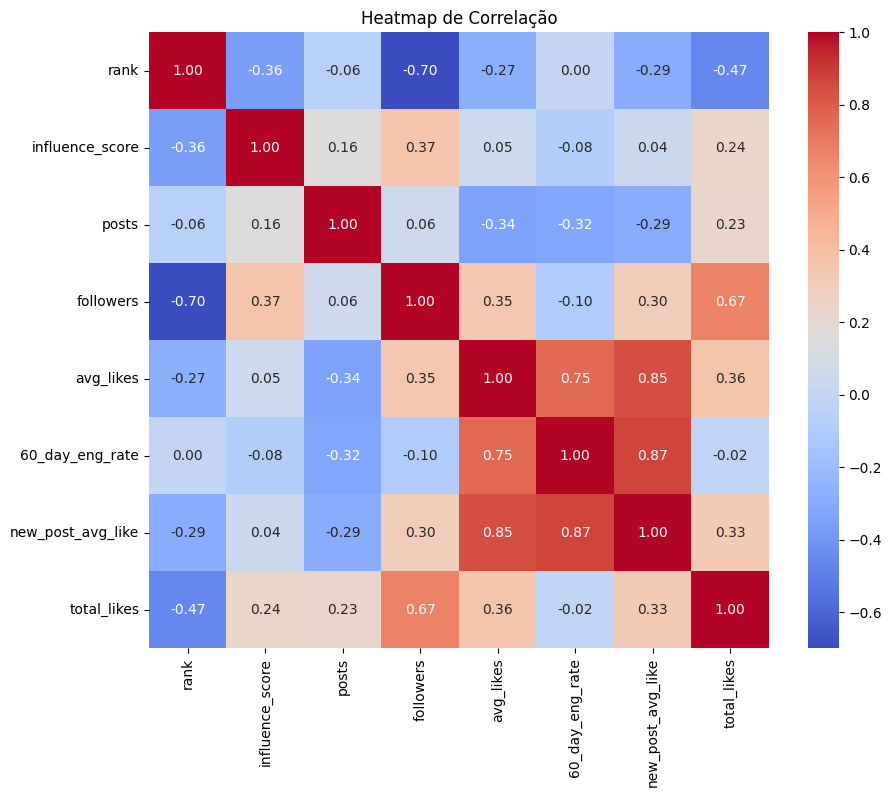

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo no Google Drive
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'

# Carregar os dados
data = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    return float(value)

columns_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
for col in columns_to_convert:
    if col in data.columns:
        data[col] = data[col].apply(convert_to_number)

# Gerar uma matriz de correlação, apenas para colunas numéricas
# O parâmetro numeric_only=True garante que apenas colunas numéricas sejam usadas
correlation_matrix = data.corr(numeric_only=True)

# Criar um heatmap usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlação")
plt.show()

3: Identificar Outliers

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


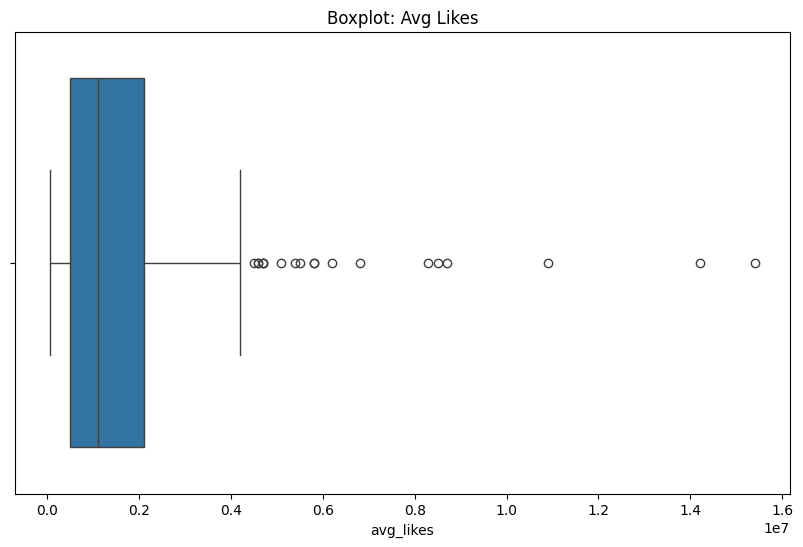

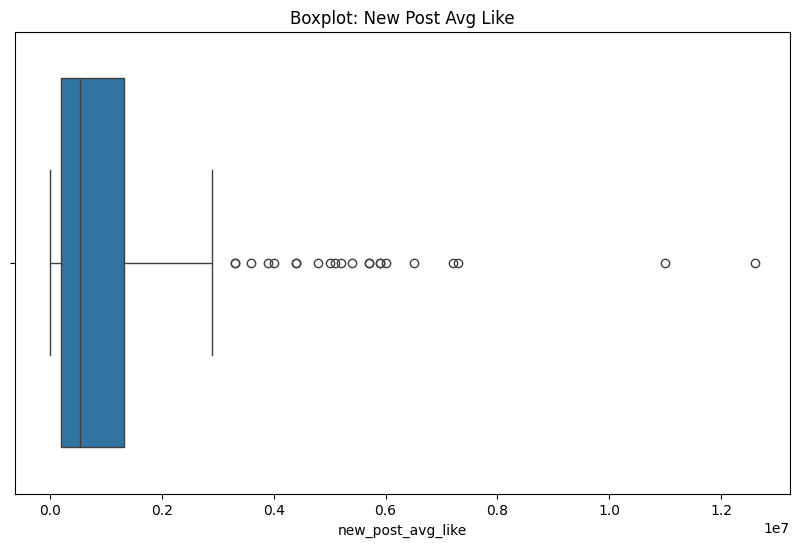

Outliers em 'avg_likes': 19
Limites para 'avg_likes': -1889000.0 a 4493400.0
Outliers em 'new_post_avg_like': 22
Limites para 'new_post_avg_like': -1498125.0 a 3018875.0


In [21]:
# Instalar bibliotecas necessárias (se ainda não instaladas)
!pip install pandas seaborn matplotlib

# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive')

# Caminho do arquivo no Google Drive
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'

# Carregar os dados
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    # Se o valor já for numérico ou não puder ser convertido, retorne como está
    try:
        return float(value)  # Trata casos em que o valor já é um número
    except ValueError:
        return value  # Trata casos em que o valor não pode ser convertido

# Lista de colunas a converter
columns_to_convert = ['posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']

# Aplicar a função de conversão
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# Visualizar outliers usando boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['avg_likes'])
plt.title("Boxplot: Avg Likes")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['new_post_avg_like'])
plt.title("Boxplot: New Post Avg Like")
plt.show()

# Função para calcular outliers com base no IQR
def identificar_outliers(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Identificar outliers em 'avg_likes'
outliers_avg_likes, limite_inf_avg, limite_sup_avg = identificar_outliers('avg_likes')
print(f"Outliers em 'avg_likes': {len(outliers_avg_likes)}")
print(f"Limites para 'avg_likes': {limite_inf_avg} a {limite_sup_avg}")

# Identificar outliers em 'new_post_avg_like'
outliers_new_post_avg, limite_inf_post, limite_sup_post = identificar_outliers('new_post_avg_like')
print(f"Outliers em 'new_post_avg_like': {len(outliers_new_post_avg)}")
print(f"Limites para 'new_post_avg_like': {limite_inf_post} a {limite_sup_post}")


1. Boxplot de avg_likes
Informações do Boxplot:
O gráfico mostra que a maioria dos valores de avg_likes está concentrada no intervalo principal (entre os limites do "box").
Outliers são os pontos fora das linhas dos bigodes (whiskers).
Os limites calculados foram:
Limite inferior: -1.889.000.0 (não aplicável, pois valores de likes não podem ser negativos).
Limite superior: 4.493.400.0.
Número de outliers identificados: 19 valores.
Interpretação:

 Valores maiores que 4.493.400 são considerados outliers.
Esses outliers podem representar influenciadores extremamente populares, com milhões de likes, que fogem da média da maioria dos influenciadores.



2. Boxplot de new_post_avg_like
Informações do Boxplot:
O gráfico de new_post_avg_like também mostra uma distribuição semelhante, com a maioria dos dados concentrados na faixa principal.
Outliers estão fora dos limites.
Os limites calculados foram:
Limite inferior: -1.498.125.0 (novamente não aplicável por ser negativo).

 Limite superior: 3.018.875.0.
Número de outliers identificados: 22 valores.
Interpretação:
Valores maiores que 3.018.875 são considerados outliers.
Assim como na variável anterior, esses outliers podem representar influenciadores que obtêm uma quantidade extraordinária de likes em novos posts.


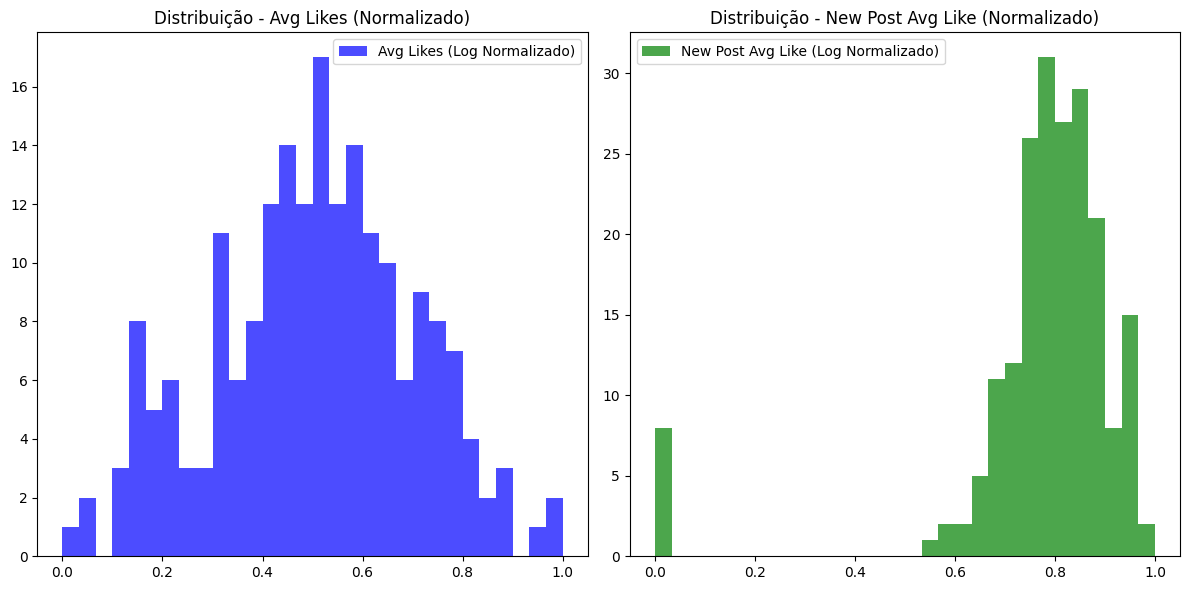

   avg_likes_log_norm  new_post_avg_like_log_norm
0            0.895531                    0.959515
1            0.886921                    0.953591
2            0.850454                    0.935649
3            0.833555                    0.918053
4            0.617189                    0.820101
A nova planilha com os dados tratados foi salva em: /content/drive/My Drive/projetounidade9/dados_tratados.csv


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)  # Retorna o valor numérico
    except ValueError:
        return value  # Mantém como está caso não seja possível converter

# Aplicar conversão nas colunas relevantes
columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# 1. Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])

# 2. Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log']]
)

# Visualização: Histogramas das variáveis transformadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['avg_likes_log_norm'], bins=30, alpha=0.7, color='blue', label='Avg Likes (Log Normalizado)')
plt.title("Distribuição - Avg Likes (Normalizado)")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['new_post_avg_like_log_norm'], bins=30, alpha=0.7, color='green', label='New Post Avg Like (Log Normalizado)')
plt.title("Distribuição - New Post Avg Like (Normalizado)")
plt.legend()

plt.tight_layout()
plt.show()

# Exibir as primeiras linhas para verificar o resultado
print(df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']].head())


# Substituir os dados antigos pelos dados tratados
df['avg_likes'] = df['avg_likes_log_norm']
df['new_post_avg_like'] = df['new_post_avg_like_log_norm']

# Remover as colunas intermediárias usadas no tratamento
df.drop(columns=['avg_likes_log', 'new_post_avg_like_log', 'avg_likes_log_norm', 'new_post_avg_like_log_norm'], inplace=True)

# Salvar a nova planilha com os dados tratados
output_file = '/content/drive/My Drive/projetounidade9/dados_tratados.csv'
df.to_csv(output_file, index=False)

print(f"A nova planilha com os dados tratados foi salva em: {output_file}")



In [25]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Carregar os dados
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)  # Retorna o valor numérico
    except ValueError:
        return value  # Mantém como está caso não seja possível converter

columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])

# Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log']]
)

# Divisão dos dados (70% Treinamento, 30% Teste)
X = df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']]
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular VIF para as variáveis independentes
vif_data = pd.DataFrame()
vif_data['Variável'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Cálculo do VIF (Variance Inflation Factor):")
print(vif_data)

# Criar tabelas de treinamento e teste
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Salvar as tabelas como arquivos CSV
train_data.to_csv('/content/drive/My Drive/projetounidade9/tabela_treinamento.csv', index=False)
test_data.to_csv('/content/drive/My Drive/projetounidade9/tabela_teste.csv', index=False)

print("As tabelas foram salvas no Google Drive:")
print("- Tabela de Treinamento: '/content/drive/My Drive/projetounidade9/tabela_treinamento.csv'")
print("- Tabela de Teste: '/content/drive/My Drive/projetounidade9/tabela_teste.csv'")



Cálculo do VIF (Variance Inflation Factor):
                     Variável       VIF
0          avg_likes_log_norm  7.609656
1  new_post_avg_like_log_norm  7.609656
As tabelas foram salvas no Google Drive:
- Tabela de Treinamento: '/content/drive/My Drive/projetounidade9/tabela_treinamento.csv'
- Tabela de Teste: '/content/drive/My Drive/projetounidade9/tabela_teste.csv'


1° IMPLEMENTAÇÃO

<ipython-input-28-12c599e372fd>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('desconhecido', inplace=True)


Valores nulos antes do tratamento:
rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      1
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

Avaliação do Modelo:
- MAE (Erro Absoluto Médio): 0.0162
- MSE (Erro Quadrático Médio): 0.0010
- R² (Coeficiente de Determinação): 0.3357

Coeficientes do Modelo:
                     Variável  Coeficiente
0          avg_likes_log_norm     0.065599
1  new_post_avg_like_log_norm     0.041870

Intercepto: -0.04805430307998624


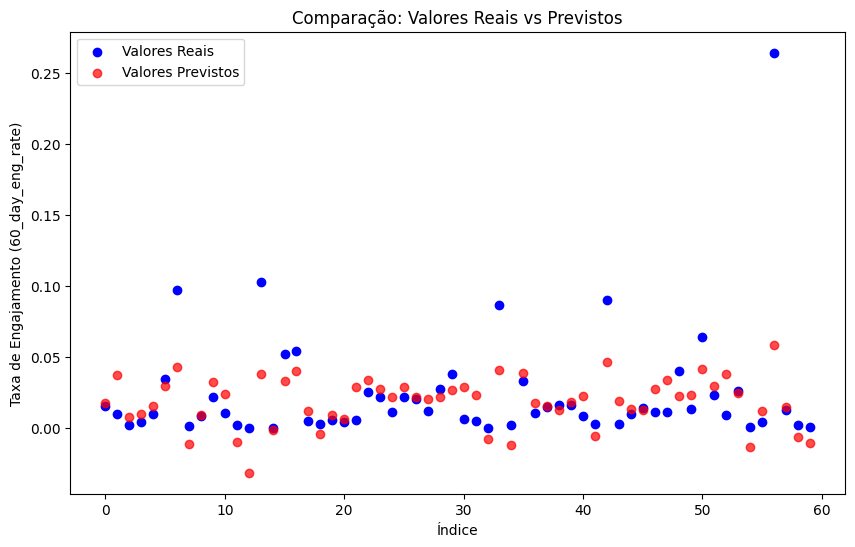

In [28]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)  # Retorna o valor numérico
    except ValueError:
        return value  # Mantém como está caso não seja possível converter

columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# Substituir valores nulos na coluna 'country' por "desconhecido"
if 'country' in df.columns:
    df['country'].fillna('desconhecido', inplace=True)

# Verificar se ainda existem valores nulos
print("Valores nulos antes do tratamento:")
print(df.isnull().sum())

# Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])

# Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log']]
)

# Divisão dos dados (70% Treinamento, 30% Teste)
X = df[['avg_likes_log_norm', 'new_post_avg_like_log_norm']]
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tratar valores nulos na variável dependente
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo com métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo:")
print(f"- MAE (Erro Absoluto Médio): {mae:.4f}")
print(f"- MSE (Erro Quadrático Médio): {mse:.4f}")
print(f"- R² (Coeficiente de Determinação): {r2:.4f}")

# Analisar os coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes do Modelo:")
print(coeficientes)

# Intercepto do modelo
print(f"\nIntercepto: {model.intercept_}")

# Visualizar a comparação entre valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Reais', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Valores Previstos', color='red', alpha=0.7)
plt.legend()
plt.title("Comparação: Valores Reais vs Previstos")
plt.xlabel("Índice")
plt.ylabel("Taxa de Engajamento (60_day_eng_rate)")
plt.show()


2° IMPLEMENTAÇÃO

<ipython-input-29-926c8266adc5>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('desconhecido', inplace=True)



Avaliação do Modelo:
- MAE (Erro Absoluto Médio): 0.0144
- MSE (Erro Quadrático Médio): 0.0008
- R² (Coeficiente de Determinação): 0.4723

Coeficientes do Modelo:
                     Variável  Coeficiente
0          avg_likes_log_norm     0.088342
1  new_post_avg_like_log_norm     0.049020
2          followers_log_norm    -0.051277
3    influence_score_log_norm     0.014527

Intercepto: -0.06597941249876621


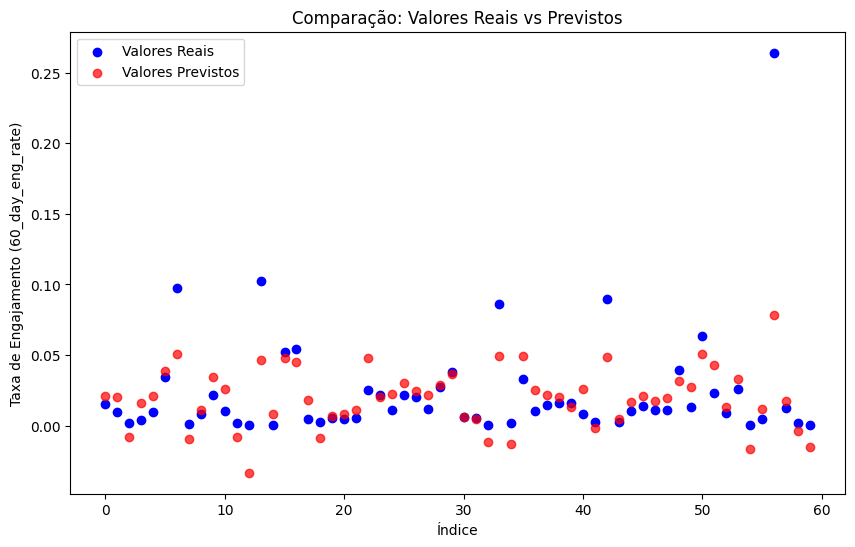

In [29]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar os dados
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)  # Retorna o valor numérico
    except ValueError:
        return value  # Mantém como está caso não seja possível converter

columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate', 'followers', 'influence_score']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# Substituir valores nulos na coluna 'country' por "desconhecido"
if 'country' in df.columns:
    df['country'].fillna('desconhecido', inplace=True)

# Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])
df['followers_log'] = np.log1p(df['followers'])
df['influence_score_log'] = np.log1p(df['influence_score'])

# Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log', 'followers_log', 'influence_score_log']]
)

# Divisão dos dados (70% Treinamento, 30% Teste)
X = df[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']]
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tratar valores nulos na variável dependente
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo com métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo:")
print(f"- MAE (Erro Absoluto Médio): {mae:.4f}")
print(f"- MSE (Erro Quadrático Médio): {mse:.4f}")
print(f"- R² (Coeficiente de Determinação): {r2:.4f}")

# Analisar os coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes do Modelo:")
print(coeficientes)

# Intercepto do modelo
print(f"\nIntercepto: {model.intercept_}")

# Visualizar a comparação entre valores reais e previstos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Valores Reais', color='blue')
plt.scatter(range(len(y_pred)), y_pred, label='Valores Previstos', color='red', alpha=0.7)
plt.legend()
plt.title("Comparação: Valores Reais vs Previstos")
plt.xlabel("Índice")
plt.ylabel("Taxa de Engajamento (60_day_eng_rate)")
plt.show()


3° IMPLEMENTAÇÃO

<ipython-input-31-df442e08cc97>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('desconhecido', inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/


Avaliação do Modelo (Regressão Linear Simples):
- MAE (Erro Absoluto Médio): 0.0149
- MSE (Erro Quadrático Médio): 0.0008
- R² (Coeficiente de Determinação): 0.4804

Avaliação do Modelo com Ridge:
- R² (Ridge): 0.4244

Avaliação do Modelo com Lasso:
- R² (Lasso): -0.0286

Variáveis Selecionadas pelo RFE:
Index(['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'interaction_term'], dtype='object')

R² Médio com Validação Cruzada: nan


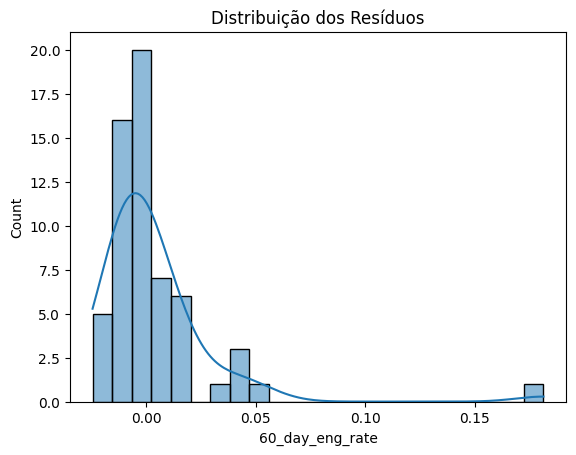

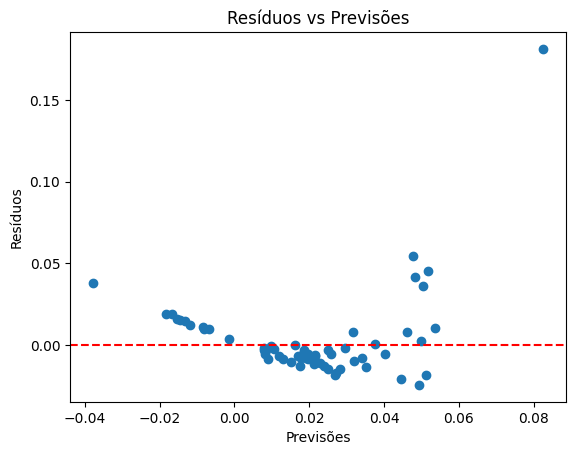

In [31]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
caminho_arquivo = '/content/drive/My Drive/projetounidade9/tabela_influenciadores.csv'
df = pd.read_csv(caminho_arquivo, sep=';', encoding='latin-1')

# Ajustar os dados (conversão de sufixos como k, m, b)
def convert_to_number(value):
    if isinstance(value, str):
        if 'k' in value:
            return float(value.replace('k', '')) * 1e3
        elif 'm' in value:
            return float(value.replace('m', '')) * 1e6
        elif 'b' in value:
            return float(value.replace('b', '')) * 1e9
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    try:
        return float(value)  # Retorna o valor numérico
    except ValueError:
        return value  # Mantém como está caso não seja possível converter

columns_to_convert = ['avg_likes', 'new_post_avg_like', '60_day_eng_rate', 'followers', 'influence_score']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_to_number)

# Substituir valores nulos na coluna 'country' por "desconhecido"
if 'country' in df.columns:
    df['country'].fillna('desconhecido', inplace=True)

# Transformação Logarítmica
df['avg_likes_log'] = np.log1p(df['avg_likes'])
df['new_post_avg_like_log'] = np.log1p(df['new_post_avg_like'])
df['followers_log'] = np.log1p(df['followers'])
df['influence_score_log'] = np.log1p(df['influence_score'])

# Normalização
scaler = MinMaxScaler()
df[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm']] = scaler.fit_transform(
    df[['avg_likes_log', 'new_post_avg_like_log', 'followers_log', 'influence_score_log']]
)

# Adicionar termo de interação
df['interaction_term'] = df['followers_log_norm'] * df['avg_likes_log_norm']

# Divisão dos dados (70% Treinamento, 30% Teste)
X = df[['avg_likes_log_norm', 'new_post_avg_like_log_norm', 'followers_log_norm', 'influence_score_log_norm', 'interaction_term']]
y = df['60_day_eng_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tratar valores nulos na variável dependente
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

# Treinar modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo (Regressão Linear Simples):")
print(f"- MAE (Erro Absoluto Médio): {mae:.4f}")
print(f"- MSE (Erro Quadrático Médio): {mse:.4f}")
print(f"- R² (Coeficiente de Determinação): {r2:.4f}")

# Regularização com Ridge e Lasso
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

print("\nAvaliação do Modelo com Ridge:")
print(f"- R² (Ridge): {ridge_model.score(X_test, y_test):.4f}")

print("\nAvaliação do Modelo com Lasso:")
print(f"- R² (Lasso): {lasso_model.score(X_test, y_test):.4f}")

# Seleção de variáveis com RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
rfe.fit(X_train, y_train)

print("\nVariáveis Selecionadas pelo RFE:")
print(X_train.columns[rfe.support_])

# Validação Cruzada
cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("\nR² Médio com Validação Cruzada:", cv_scores.mean())

# Análise de resíduos
residuos = y_test - y_pred
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs Previsões")
plt.xlabel("Previsões")
plt.ylabel("Resíduos")
plt.show()
